In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
import pandas

Código proporcionado en la clase.

In [26]:
def IniciaPob(N, n_var, n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I + sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v, 2)
        val = v_min[i] + d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb     

def Pop_Aptitude(P):
    apt_v = []
    for I in P:
        ap = Aptitude(I)
        #print 'Individuo ' + I + ', aptitud = '  + str(ap)
        apt_v.append(ap)
    return apt_v

def CrossOver(I1, I2):
    n = len(I1)
    p = randint(1, n-2)
    b1 = I1[:p]
    b2 = I2[p:]
    return b1+b2

def select(P, Aptitude):
    apt_acum = sum(Aptitude)
    r = random()*apt_acum
    s = 0
    for i,I in enumerate(P):
        s = s + Aptitude[i]
        if s >= r:
            return I
    return I  

def Mutation(P, pm):
    PM = []
    cs = {'0':'1','1':'0'}
    for I in P:
        nI = ''
        for b in I:
            if random() < pm:
                nI = nI + cs[b]
            else:
                nI = nI + b
        PM.append(nI)
    return PM    

def SelectP(P1, P2, A1, A2):
    PS = []
    for i in range(len(P1)):
        if A1[i] > A2[i]:
            PS.append(P1[i])
        else:
            PS.append(P2[i])
    return PS

Modificación del código proporcionado en la clase para la solución particular del problema planteado.

In [27]:
# Modificación: la cantidad de variables y función se han adecuado al problema.
def Aptitude(I):
    [x1, x2, x3, x4, x5, x6] = Ind2Number(I,v_min,v_max,n_var,n_bits)
    r = 0
    for i in range(0, 500):
        r += abs( x1 + x2*(np.e**(-((x3-df.t[i])**2)/x4)) + x5*np.cos(x6*df.t[i]) - df.y[i] )
    return 1.0/(1.0+0.1*r)  

# Modificación: Se añadio el parametro que permite introducir una probabilidad de cruza.
def CrossOverPop(P, Aptitude, pc):
    CrossP = []
    for I in P:
        not_crossed = True
        while not_crossed:
            if random() < pc:
                I1 = select(P, Aptitude)
                I2 = select(P, Aptitude)
                nI = CrossOver(I1, I2)
                CrossP.append(nI)
                not_crossed = False
    return CrossP  

# Modificación: Recibe la probabilidad de cruza y es pasada a la función que se encarga
# de cruzar a la población.
def Evolution(P0, pm, pc, gnrtns):
    P = P0
    for g in range(gnrtns):
        AP = Pop_Aptitude(P)
        PC = CrossOverPop(P, AP, pc)
        PM = Mutation(PC, pm)
        AM = Pop_Aptitude(PM)
        P = SelectP(P, PM, AP, AM)
    return P   

Función que se encarga de obtener al individuo con la mayor aptitutd, sera util para escoger al individuo de la población final.

In [28]:
def SelectI(P, A_final):
    best_I = P[0]
    best_A = A_final[0]
    for i in range(1, len(P)):
        if A_final[i] > best_A:
            best_I = P[i]
            best_A = A_final[i]
    return best_I

Se cargan los datos.

In [29]:
df = pandas.read_csv('datos.csv')
print(df)

     Unnamed: 0         t         y
0             1  4.308834  0.370224
1             2  4.214515 -0.130361
2             3  1.499386  3.222225
3             4 -3.436496  3.054656
4             5  4.101437  1.096910
..          ...       ...       ...
495         496  3.141437  3.505195
496         497 -0.463158  4.037868
497         498 -1.300353 -0.350502
498         499  3.226590  2.430070
499         500  0.126243  4.073026

[500 rows x 3 columns]


Gráfica de dispersion para los datos del archivo a modo de verificación.

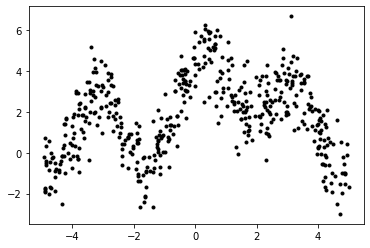

In [30]:
plt.scatter(df.t, df.y, marker= '.', color = "black")
plt.show()

Uso del algoritmo genético para encontrar los parametros $x_1$ a $x_6$.

In [37]:
def f(x1, x2, x3, x4, x5, x6): 
    r = 0
    for i in range(500): 
        r += abs( x1 + x2*(np.e**(-((x3-df.t[i])**2)/x4)) + x5*np.cos(x6*df.t[i]) - df.y[i] )
    return r

N = 100
n_var = 6
n_bits = 10
P0 = IniciaPob(N, n_var, n_bits)
v_min = [-5, -5, -5, -5, -5, -5]
v_max = [5, 5, 5, 5, 5, 5]
n_gens = 50
P = Evolution(P0, 0.01, 0.7, n_gens)

for I in P:
    [x1, x2, x3, x4, x5, x6] = Ind2Number(I, v_min, v_max, n_var, n_bits)

    print("x = (" + str(round(x1,2)) + ", " + str(round(x2,2)) 
         + ", " + str(round(x3,2)) + ", " + str(round(x4,2)) 
         + ", " + str(round(x5,2)) + ", " + str(round(x6,2))
         + "), f(x) = " + str(f(x1, x2, x3, x4, x5, x6)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


x = (1.06, 3.1, 1.1, 1.89, 2.09, 1.97), f(x) = 409.9146056339507
x = (1.06, 3.1, 1.1, 1.93, 2.05, 1.97), f(x) = 408.83588217459527
x = (1.06, 3.12, 1.1, 1.89, 2.09, 1.97), f(x) = 409.6764528942207
x = (1.07, 3.12, 1.1, 1.99, 1.93, 1.97), f(x) = 407.9007476309289
x = (1.08, 3.12, 1.14, 1.99, 1.93, 1.97), f(x) = 407.84458750203225
x = (1.06, 3.12, 1.1, 1.89, 1.93, 1.97), f(x) = 408.5567782319075
x = (1.06, 3.12, 1.1, 1.99, 1.93, 1.97), f(x) = 408.0560178624647
x = (1.07, 3.1, 1.1, 1.99, 1.93, 1.97), f(x) = 408.02791522091144
x = (1.08, 3.1, 1.1, 1.99, 1.93, 1.97), f(x) = 407.9182230079767
x = (1.08, 3.12, 1.1, 1.89, 1.93, 1.97), f(x) = 408.2120811509094
x = (1.06, 3.1, 1.1, 1.89, 1.93, 1.97), f(x) = 408.70304641091656
x = (1.07, 3.1, 1.1, 1.89, 1.93, 1.97), f(x) = 408.4887321149361
x = (1.08, 3.1, 1.1, 1.97, 1.93, 1.97), f(x) = 407.9917779446647
x = (1.08, 3.1, 1.1, 2.15, 2.01, 1.97), f(x) = 408.5401839219669
x = (1.08, 3.06, 1.1, 2.28, 1.93, 1.97), f(x) = 408.5576177338549
x = (1.08, 3.

De la población final se selecciona a aquel individuo que tenga la mayor aptitud.

In [55]:
A_final = Pop_Aptitude(P)
bestI = SelectI(P, A_final)
[x1, x2, x3, x4, x5, x6] = Ind2Number(bestI, v_min, v_max, n_var, n_bits)

print('Individuo de la población final con la mayor aptitud')
print("x = (" + str(round(x1,2)) + ", " + str(round(x2,2)) 
        + ", " + str(round(x3,2)) + ", " + str(round(x4,2)) 
        + ", " + str(round(x5,2)) + ", " + str(round(x6,2))
        + "), f(x) = " + str(f(x1, x2, x3, x4, x5, x6)))

Individuo de la población final con la mayor aptitud
x = (1.08, 3.12, 1.1, 2.05, 1.93, 1.97), f(x) = 407.76930295633065


Valor de los parametros optimos encontrados.

In [53]:
print('x1:', round(x1, 2))
print('x2:', round(x2, 2))
print('x3:', round(x3, 2))
print('x4:', round(x4, 2))
print('x5:', round(x5, 2))
print('x6:', round(x6, 2))

x1: 1.08
x2: 3.12
x3: 1.1
x4: 2.05
x5: 1.93
x6: 1.97


En la siguiente gráfica los puntos negros representan los puntos del conjunto de datos del archivo, mientras que la curva roja, es la curva f(t) determinada por los parámetros recuperados tras aplicar el algoritmo evolutivo.

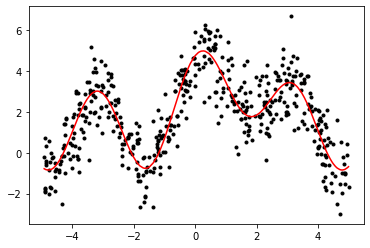

In [54]:
abscisas = sorted(df.t)
abscisas = np.array(abscisas)
f_t_pre = x1 + x2*(np.e**(-((x3-abscisas)**2)/x4)) + x5*np.cos(x6*abscisas)

plt.plot(abscisas, f_t_pre, color = "red") # Grafica de la curva f(t) calculada.
plt.scatter(df.t, df.y, marker = ".", color = "black") # Puntos del conjunto de datos.
plt.show()

Como se puede apreciar la curva roja se alinea bastante bien a los puntos lo que signfica que con el uso de los algoritmos geneticos se logro obtener de manera correcta los valores de los parámetros $x_1$, $x_2$, $x_3$, $x_4$, $x_5$ y $x_6$.
